Found 10000 images belonging to 100 classes.


c:\Users\Faqih SA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 75s 238ms/step

Akurasi Model: 0.7184

Classification Report:
                         precision  recall  f1-score     support
apple_pie                     0.48    0.58      0.53    100.0000
baby_back_ribs                0.78    0.72      0.75    100.0000
baklava                       0.64    0.88      0.74    100.0000
beef_tartare                  0.77    0.79      0.78    100.0000
beet_salad                    0.51    0.75      0.61    100.0000
beignet                       0.68    0.94      0.79    100.0000
bibimbap                      0.91    0.85      0.88    100.0000
bread_pudding                 0.54    0.62      0.58    100.0000
breakfast_burrito             0.66    0.71      0.68    100.0000
bruschetta                    0.78    0.39      0.52    100.0000
caesar_salad                  0.54    0.88      0.67    100.0000
calamari                      0.75    0.81      0.78    100.0000
cannoli                       0.80    0.84      0.82    100.0000

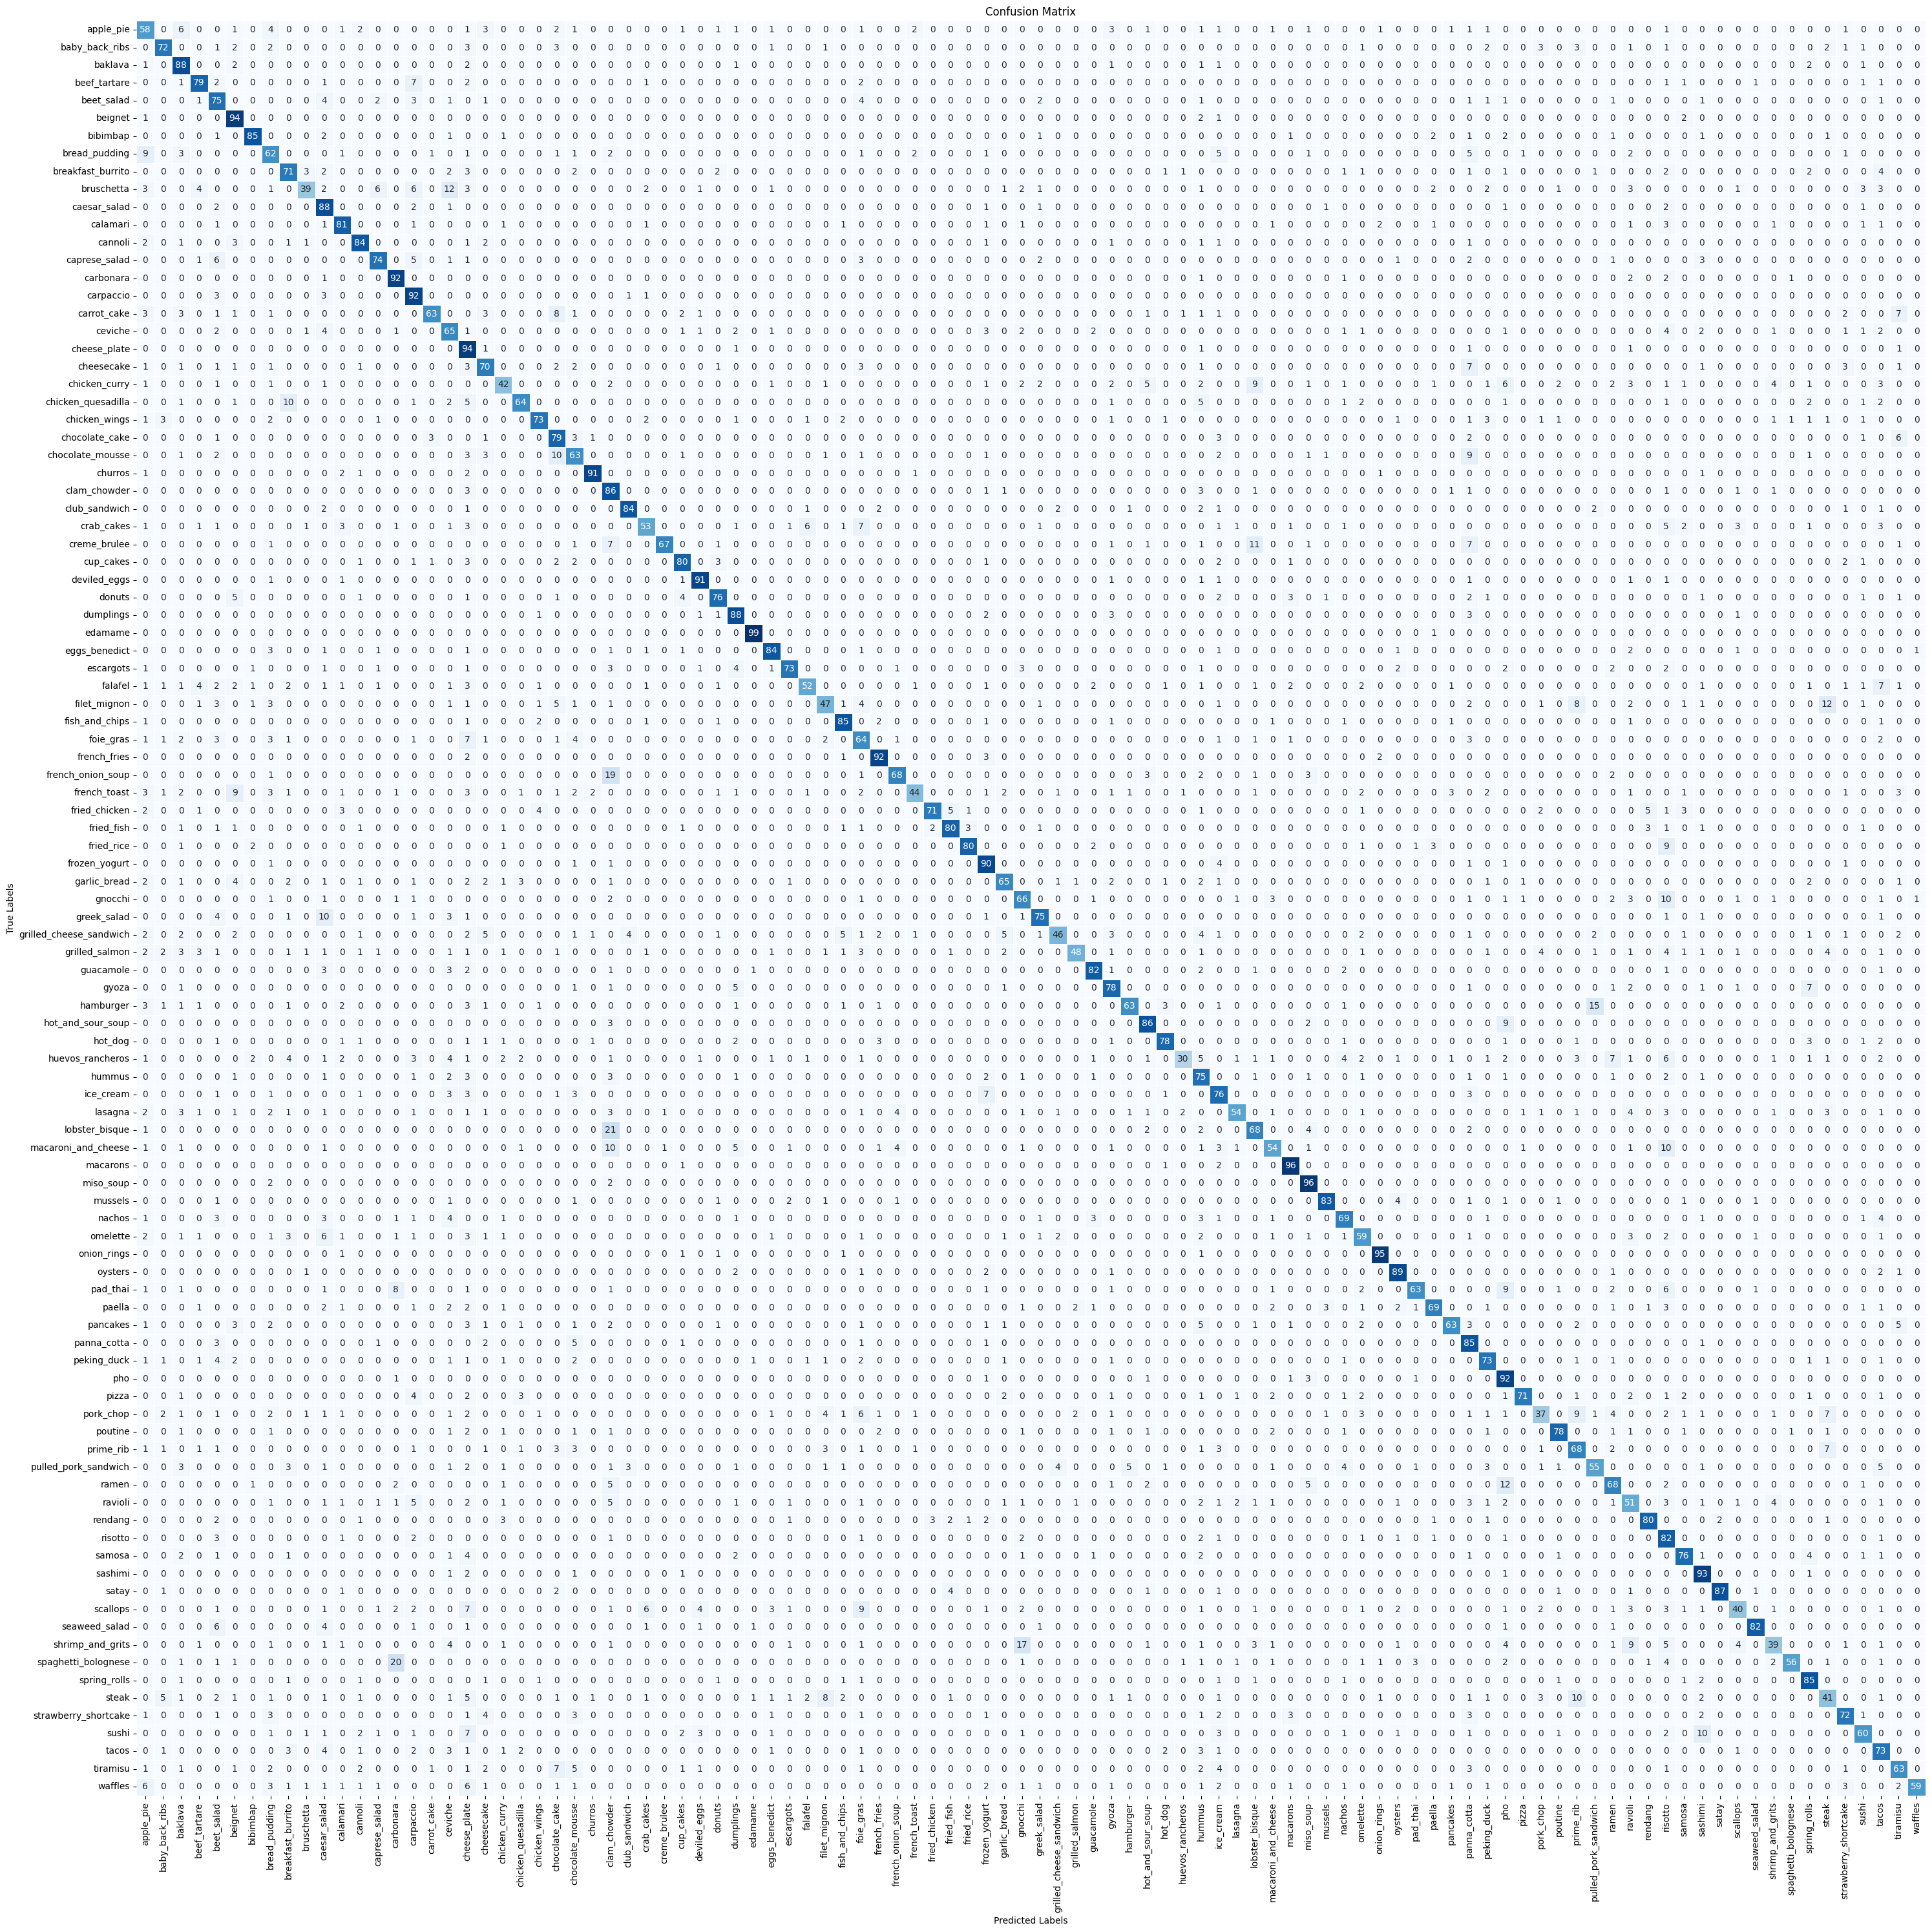

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load model
model = tf.keras.models.load_model('final_mobilenetv2_food_finetune_100.keras')

# Direktori dataset uji
test_dir = 'foodtest'
image_size = (224, 224)
batch_size = 32

# ImageDataGenerator untuk data uji (tanpa augmentasi)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generator data uji
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # jangan acak agar evaluasi sesuai urutan label
)

# Prediksi
predictions = model.predict(test_generator, verbose=1)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Hitung akurasi
accuracy = accuracy_score(y_true, y_pred)
print(f'\nAkurasi Model: {accuracy:.4f}')

# --- Classification Report ---
print("\nClassification Report:")
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Membulatkan ke 2 angka desimal (kecuali support dan akurasi)
for col in ['precision', 'recall', 'f1-score']:
    df_report[col] = df_report[col].apply(lambda x: round(x, 2))

# Menampilkan seluruh baris
pd.set_option('display.max_rows', None)
print(df_report)

# Jika ingin disimpan ke file:
# df_report.to_csv("classification_report.csv")

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(30, 30))
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels,
    linewidths=0.5,
    cbar=False
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


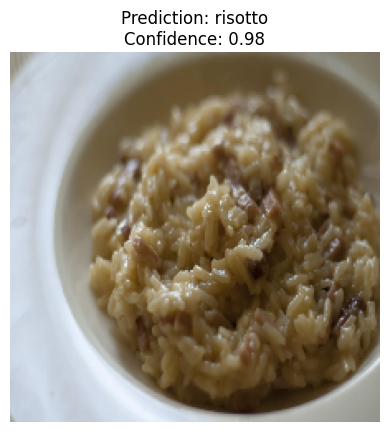

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('final_mobilenetv2_food_finetune_100.keras')

# Replace this with your actual class labels
class_labels = [
    'apple_pie', 'baby_back_ribs', 'baklava', 'beef_tartare', 'beet_salad', 'beignet', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 
    'bruschetta', 'caesar_salad', 'calamari', 'cannoli', 'caprese_salad', 'carbonara', 'carpaccio', 'carrot_cake', 'ceviche', 
    'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 
    'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 
    'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 
    'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 
    'french_onion_soup', 'french_toast', 'fried_chicken', 'fried_fish', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 
    'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 
    'ice_cream', 'lasagna', 'lobster_bisque', 'macaroni_and_cheese', 'macarons', 
    'miso_soup', 'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 
    'pancakes', 'panna_cotta', 'peking_duck', 'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 
    'pulled_pork_sandwich', 'ramen', 'ravioli', 'rendang', 'risotto', 'samosa', 'sashimi', 'satay', 'scallops', 'seaweed_salad', 
    'shrimp_and_grits', 'spaghetti_bolognese', 'spring_rolls', 'steak', 'strawberry_shortcake', 
    'sushi', 'tacos', 'tiramisu', 'waffles'
]

def predict_image(img_path):
    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale the image

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence_score = predictions[0][predicted_class]

    # Get the label of the predicted class
    predicted_label = class_labels[predicted_class]

    # Plot the image
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence_score:.2f}")
    plt.axis('off')
    plt.show()

# Replace this with the path to the image you want to classify
img_path = 'food_images/fried_rice.jpg'
predict_image(img_path)
